### Problem Statement
Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers;
and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.
    

## 🎯 **Objective**## 🎯 **Objective**
Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

- Identify top-performing products, channels, and regions driving revenue and profit  
- Uncover seasonal trends and anomalies for optimized planning  
- Spot pricing and margin risks from outlier transactions  
- Inform pricing, promotion, and market-expansion strategies  

These findings will guide the design of a Power BI dashboard to support strategic decision-making and sustainable growth.

# **📥 Setup & Configuration**

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [63]:
df_sale= pd.read_excel('Updated_Sales_Orders.xlsx')
df_sale.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2023-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918


In [65]:
sd = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name= None)
sd

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [66]:
df_customers = sd['Customers']
df_Products = sd['Products']
df_region = sd['Regions']
df_state_rega = sd['State Regions']
df_budgets = sd['2017 Budgets']


In [69]:
print(f'''
df_sale shape : {df_sale.shape}
df_customers shape : {df_customers.shape}
df_Products shape: {df_Products.shape}
df_regions shape: {df_region.shape}
df_state_reg shape: {df_state_rega.shape}
df_budgets shape: {df_budgets.shape}''')


df_sale shape : (64104, 12)
df_customers shape : (175, 2)
df_Products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


In [71]:
df_budgets.head()


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [73]:
df_budgets.isnull().sum()


Product Name    0
2017 Budgets    0
dtype: int64

In [75]:
df_state_rega.columns = df_state_rega.iloc[0]
df_state_rega = df_state_rega.drop([0]).reset_index(drop=True)

In [77]:
df_state_rega.head()


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [79]:
df_state_rega.isnull().sum()


0
State Code    0
State         0
Region        0
dtype: int64

In [81]:
df_region.isnull().sum()


id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [83]:
df_region.head()


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [85]:
df_customers.isnull().sum()


Customer Index    0
Customer Names    0
dtype: int64

In [87]:
df_customers.head()


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [89]:
df_region.isnull().sum()


id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [91]:
df_region.head()


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [93]:
df_customers.isnull().sum()


Customer Index    0
Customer Names    0
dtype: int64

In [95]:
df_customers.head()


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [97]:
# merge with customers
rj = df_sale.merge(
    df_customers,
    how='left',
    left_on= 'Customer Name Index',
    right_on= 'Customer Index'
)
rj.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2023-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2022-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [99]:
# merge with producs
rj = rj.merge(
    df_Products,
    how='left',
    left_on= 'Product Description Index',
    right_on= 'Index'
)
rj.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2023-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2022-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [101]:
# merge with Reions
rj = rj.merge(
    df_region,
    how='left',
    left_on= 'Delivery Region Index',
    right_on= 'id'
)
rj.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2023-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2022-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [103]:
# merge with State index
rj = rj.merge(
    df_state_rega[['State Code','Region']],
    how='left',
    left_on= 'state_code',
    right_on= 'State Code'
)
rj.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2023-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2022-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [105]:
df_budgets = df_budgets.columns.str.lower()
df_budgets

Index(['product name', '2017 budgets'], dtype='object')

In [107]:
# Customer Indexabs
# Index
# id
#State Code 

# clean up redundant columns 

drop_to = ['Customer Index','Index','id','State Code']
rj = rj.drop(columns=drop_to,errors= 'ignore')
rj.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2023-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West
3,SO - 0005614,2022-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast


In [109]:
# convert all columns to lower case for consistency and easier access
rj.columns = rj.columns.str.lower()
rj.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region'],
      dtype=object)

In [111]:
keep_to = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel', 
    'order quantity', 
    'product name',
    'unit price', 
    'line total' ,
    'total unit cost',
    'state_code',
    'state',
    'county',
    'region',
    'longitude',
    'latitude'
]

In [113]:
rj = rj[keep_to]
rj.head()

,ordernumber,orderdate,customer names,channel,order quantity,product name,unit price,line total,total unit cost,state_code,state,county,region,longitude,latitude
0,SO - 000225,2023-01-01,Rhynoodle Ltd,Wholesale,6,Product 27,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,-81.09983,32.08354
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,11,Product 20,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,-86.10665,39.61366
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,6,Product 26,978.2,5869.2,684.740,CA,California,Alameda County,West,-121.87468,37.66243
3,SO - 0005614,2022-01-01,Colgate-Pa Group,Export,7,Product 7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,-86.52639,39.16533
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,8,Product 8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,-72.52443,41.77524


In [115]:
rj.isnull().sum()

ordernumber        0
orderdate          0
customer names     0
channel            0
order quantity     0
product name       0
unit price         0
line total         0
total unit cost    0
state_code         0
state              0
county             0
region             0
longitude          0
latitude           0
dtype: int64

In [117]:
rj = rj.rename(columns={
     'ordernumber':'order_name',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'channel':'channel_name',
    'order quantity':'order_qty',
    'product name':'product_name',
    'unit price':'unit_name', 
    'line total':'line_total' ,
    'total unit cost':'total_unit_cost',
})

In [119]:
rj.head()

,order_name,order_date,customer_name,channel_name,order_qty,product_name,unit_name,line_total,total_unit_cost,state_code,state,county,region,longitude,latitude
0,SO - 000225,2023-01-01,Rhynoodle Ltd,Wholesale,6,Product 27,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,-81.09983,32.08354
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,11,Product 20,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,-86.10665,39.61366
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,6,Product 26,978.2,5869.2,684.740,CA,California,Alameda County,West,-121.87468,37.66243
3,SO - 0005614,2022-01-01,Colgate-Pa Group,Export,7,Product 7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,-86.52639,39.16533
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,8,Product 8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,-72.52443,41.77524


In [121]:
rj['total_cost'] = rj['order_qty']* rj['total_unit_cost']
rj.head(5)

,order_name,order_date,customer_name,channel_name,order_qty,product_name,unit_name,line_total,total_unit_cost,state_code,state,county,region,longitude,latitude,total_cost
0,SO - 000225,2023-01-01,Rhynoodle Ltd,Wholesale,6,Product 27,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,-81.09983,32.08354,10946.058
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,11,Product 20,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,-86.10665,39.61366,13969.098
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,6,Product 26,978.2,5869.2,684.740,CA,California,Alameda County,West,-121.87468,37.66243,4108.440
3,SO - 0005614,2022-01-01,Colgate-Pa Group,Export,7,Product 7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,-86.52639,39.16533,7201.964
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,8,Product 8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,-72.52443,41.77524,10082.160


In [123]:
rj['profit'] = rj['line_total'] - rj['total_cost']
rj.head()

,order_name,order_date,customer_name,channel_name,order_qty,product_name,unit_name,line_total,total_unit_cost,state_code,state,county,region,longitude,latitude,total_cost,profit
0,SO - 000225,2023-01-01,Rhynoodle Ltd,Wholesale,6,Product 27,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,-81.09983,32.08354,10946.058,4048.542
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,11,Product 20,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,-86.10665,39.61366,13969.098,11899.602
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,6,Product 26,978.2,5869.2,684.740,CA,California,Alameda County,West,-121.87468,37.66243,4108.440,1760.760
3,SO - 0005614,2022-01-01,Colgate-Pa Group,Export,7,Product 7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,-86.52639,39.16533,7201.964,9166.136
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,8,Product 8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,-72.52443,41.77524,10082.160,8249.040


In [125]:
rj['margin_pct'] = rj['profit']/rj['line_total'] * 100
rj.head()

,order_name,order_date,customer_name,channel_name,order_qty,product_name,unit_name,line_total,total_unit_cost,state_code,state,county,region,longitude,latitude,total_cost,profit,margin_pct
0,SO - 000225,2023-01-01,Rhynoodle Ltd,Wholesale,6,Product 27,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,-81.09983,32.08354,10946.058,4048.542,27.0
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,11,Product 20,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,-86.10665,39.61366,13969.098,11899.602,46.0
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,6,Product 26,978.2,5869.2,684.740,CA,California,Alameda County,West,-121.87468,37.66243,4108.440,1760.760,30.0
3,SO - 0005614,2022-01-01,Colgate-Pa Group,Export,7,Product 7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,-86.52639,39.16533,7201.964,9166.136,56.0
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,8,Product 8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,-72.52443,41.77524,10082.160,8249.040,45.0


In [127]:
#  EDA

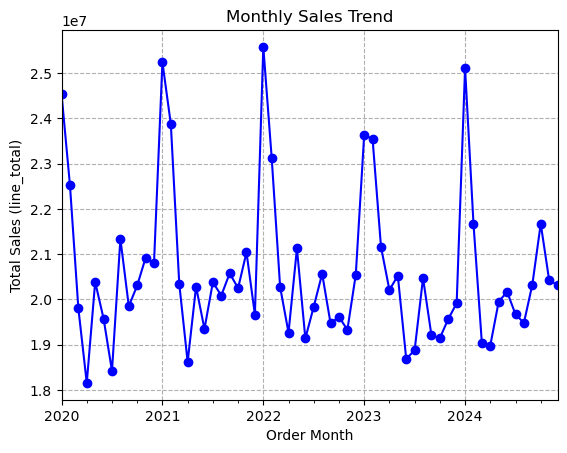

In [129]:
rj['order_month'] = rj['order_date'].dt.to_period('M')
rs= rj.groupby('order_month')['line_total'].sum()
rs.plot(marker='o', color='b')  

plt.xlabel('Order Month')
plt.ylabel('Total Sales (line_total)')
plt.title('Monthly Sales Trend')
plt.grid(True,linestyle='--')
plt.show()



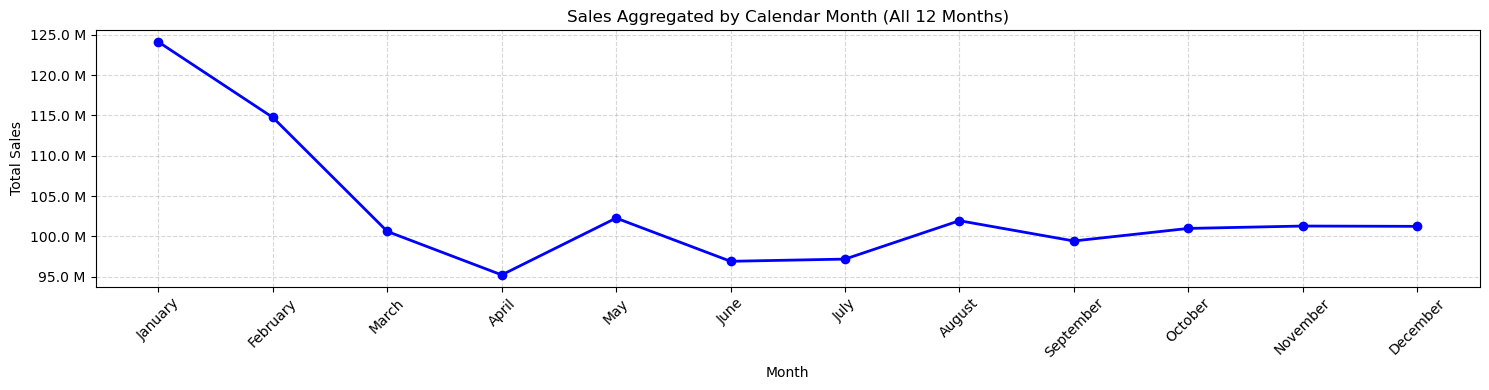

In [131]:
# rj['order_month_name'] = rj['order_date'].dt.month_name()
# rj['order_month_num'] = rj['order_date'].dt.month
# monthly_sales = rj.groupby(['order_month_num','order_month_name'])['line_total'].sum().sort_index()
# plt.figure(figsize=(15, 4))
# monthly_sales.plot(marker = 'o',color = 'r')
# plt.title('Mounth wise sales')
# plt.xlabel('order_month_name')
# plt.ylabel('line_total')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.xticks(rotation=45)

# plt.show()

from matplotlib.ticker import EngFormatter


rj['order_date'] = pd.to_datetime(rj['order_date'])

rj['month_num'] = rj['order_date'].dt.month
rj['month_name'] = rj['order_date'].dt.month_name()

monthly = rj.groupby(['month_num', 'month_name'])['line_total'].sum()

month_order = [(i, pd.to_datetime(str(i), format='%m').strftime('%B')) for i in range(1, 13)]
index = pd.MultiIndex.from_tuples(month_order, names=['month_num', 'month_name'])
monthly = monthly.reindex(index, fill_value=0)

monthly.index = monthly.index.droplevel(0)

plt.figure(figsize=(15, 4))
plt.plot(monthly.index, monthly.values, marker='o', color='b', linewidth=2)

formatter = EngFormatter(unit='', places=1)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Sales Aggregated by Calendar Month (All 12 Months)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


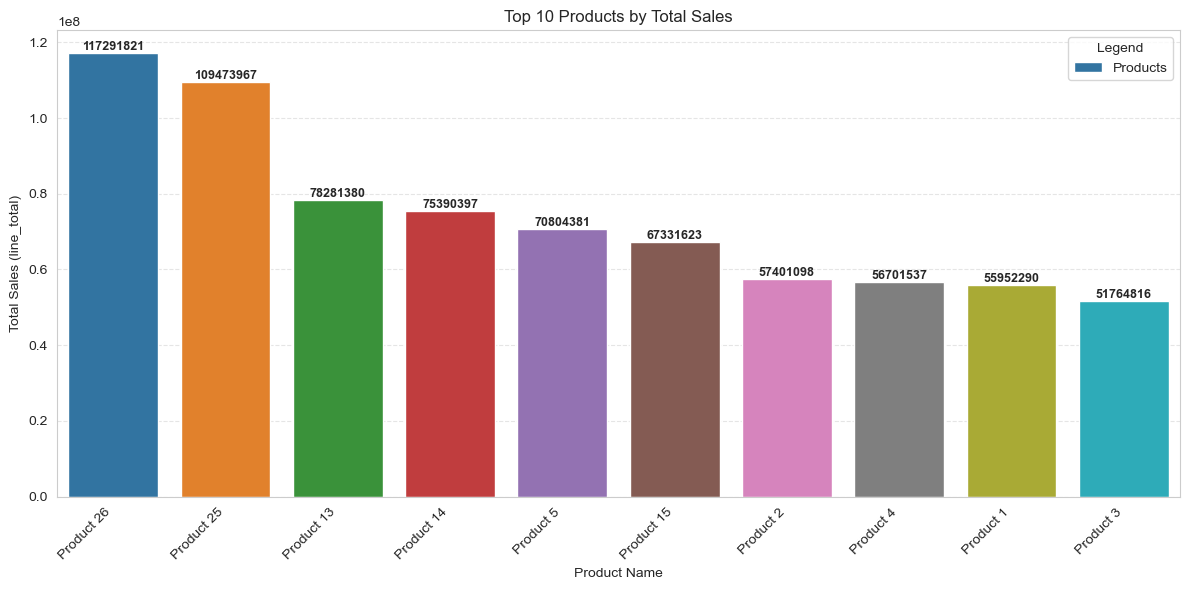

In [135]:


# top_ten = rj.groupby("product_name")['line_total'].sum().sort_values(ascending=False).head(10)

# plt.figure(figsize=(12, 6))
# top_ten.plot(kind='bar', color='skyblue')


# plt.title('Top 10 Products by Total Sales')
# plt.xlabel('Product Name')
# plt.ylabel('Total Sales (line_total)')
# plt.xticks(rotation=45, ha='right')  
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()


# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare data
top_ten = rj.groupby("product_name")['line_total'].sum().sort_values(ascending=True).head(10)
top_ten_df = top_ten.reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=top_ten_df,
    x='product_name',
    y='line_total',
    hue='product_name',        
    dodge=False,
    legend = True,
    palette='tab10'            
)

handles, labels = barplot.get_legend_handles_labels()
barplot.legend(handles=handles[:1], labels=["Products"], title="Legend")

for index, row in top_ten_df.iterrows():
    plt.text(index, row['line_total'], f"{row['line_total']:.0f}",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Step 5: Final styling
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (line_total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


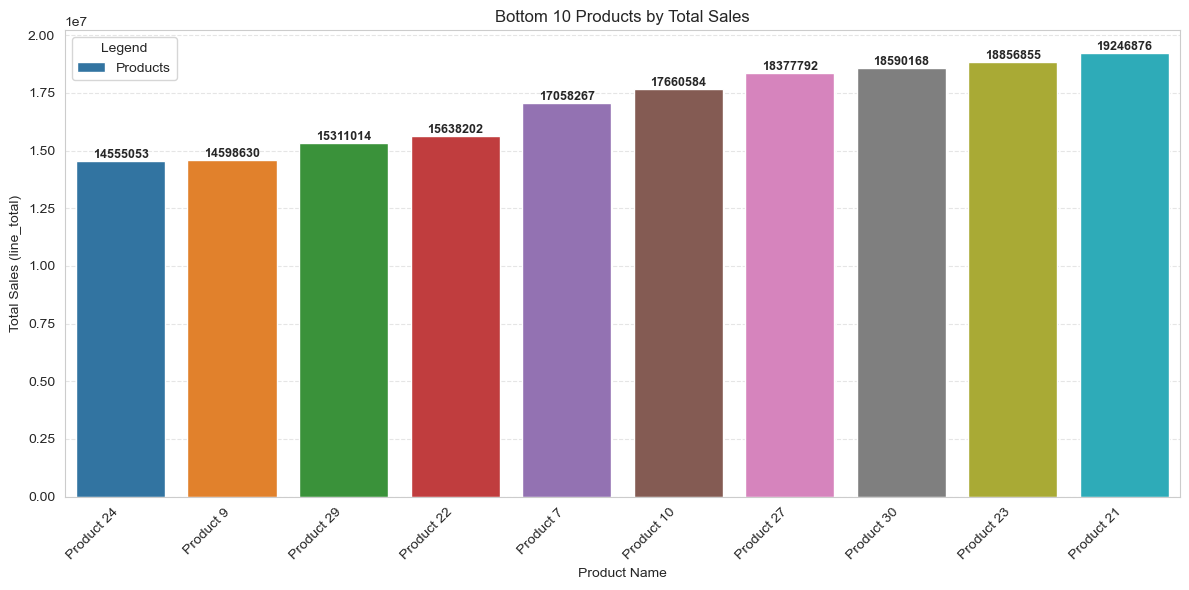

In [145]:


# top_ten = rj.groupby("product_name")['line_total'].sum().sort_values(ascending=False).head(10)

# plt.figure(figsize=(12, 6))
# top_ten.plot(kind='bar', color='skyblue')


# plt.title('Top 10 Products by Total Sales')
# plt.xlabel('Product Name')
# plt.ylabel('Total Sales (line_total)')
# plt.xticks(rotation=45, ha='right')  
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()


# plt.show()



# Step 1: Prepare data
top_ten = rj.groupby("product_name")['line_total'].sum().sort_values(ascending=True).head(10)
top_ten_df = top_ten.reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=top_ten_df,
    x='product_name',
    y='line_total',
    hue='product_name',         
    dodge=False,
    legend = True,
    palette='tab10'             
)


handles, labels = barplot.get_legend_handles_labels()
barplot.legend(handles=handles[:1], labels=["Products"], title="Legend")

for index, row in top_ten_df.iterrows():
    plt.text(index, row['line_total'], f"{row['line_total']:.0f}",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Step 5: Final styling
plt.title('Bottom 10 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (line_total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


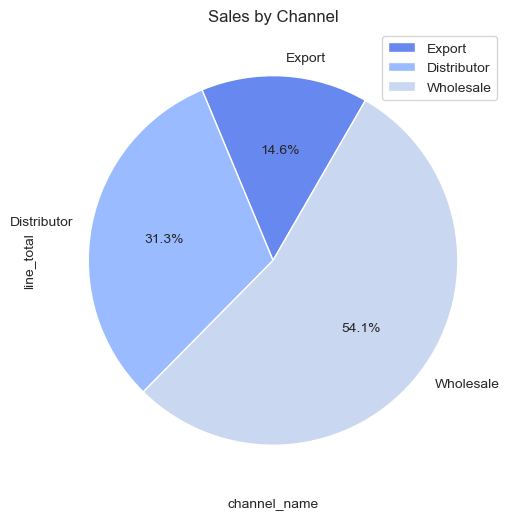

In [165]:
# Sales by Channel
chan_sales = rj.groupby('channel_name')['line_total'].sum().sort_values(ascending=True)
plt.figure(figsize=(15,6))
chan_sales.plot(x='channel_name',
                y='line_total',kind='pie',
                startangle=60,autopct='%1.1f%%',
                legend = True,
               colors = sns.color_palette('coolwarm'))
plt.title('Sales by Channel')
plt.xlabel('channel_name')
plt.ylabel('line_total')
plt.show()



# chan_sales = rj.groupby('channel_name')['line_total'].sum().sort_values(ascending=True)


# plt.figure(figsize=(10, 6))
# plt.pie(chan_sales, 
#         labels=chan_sales.index, 
#         autopct='%1.1f%%', 
#         startangle=60, 
#         wedgeprops={'edgecolor': 'white'})

# plt.title('Sales by Channel')
# plt.axis('equal') 
# plt.tight_layout()
# plt.show()


In [177]:
rj.isnull().sum()

order_name         0
order_date         0
customer_name      0
channel_name       0
order_qty          0
product_name       0
unit_name          0
line_total         0
total_unit_cost    0
state_code         0
state              0
county             0
region             0
longitude          0
latitude           0
total_cost         0
profit             0
margin_pct         0
order_month        0
month_num          0
month_name         0
dtype: int64

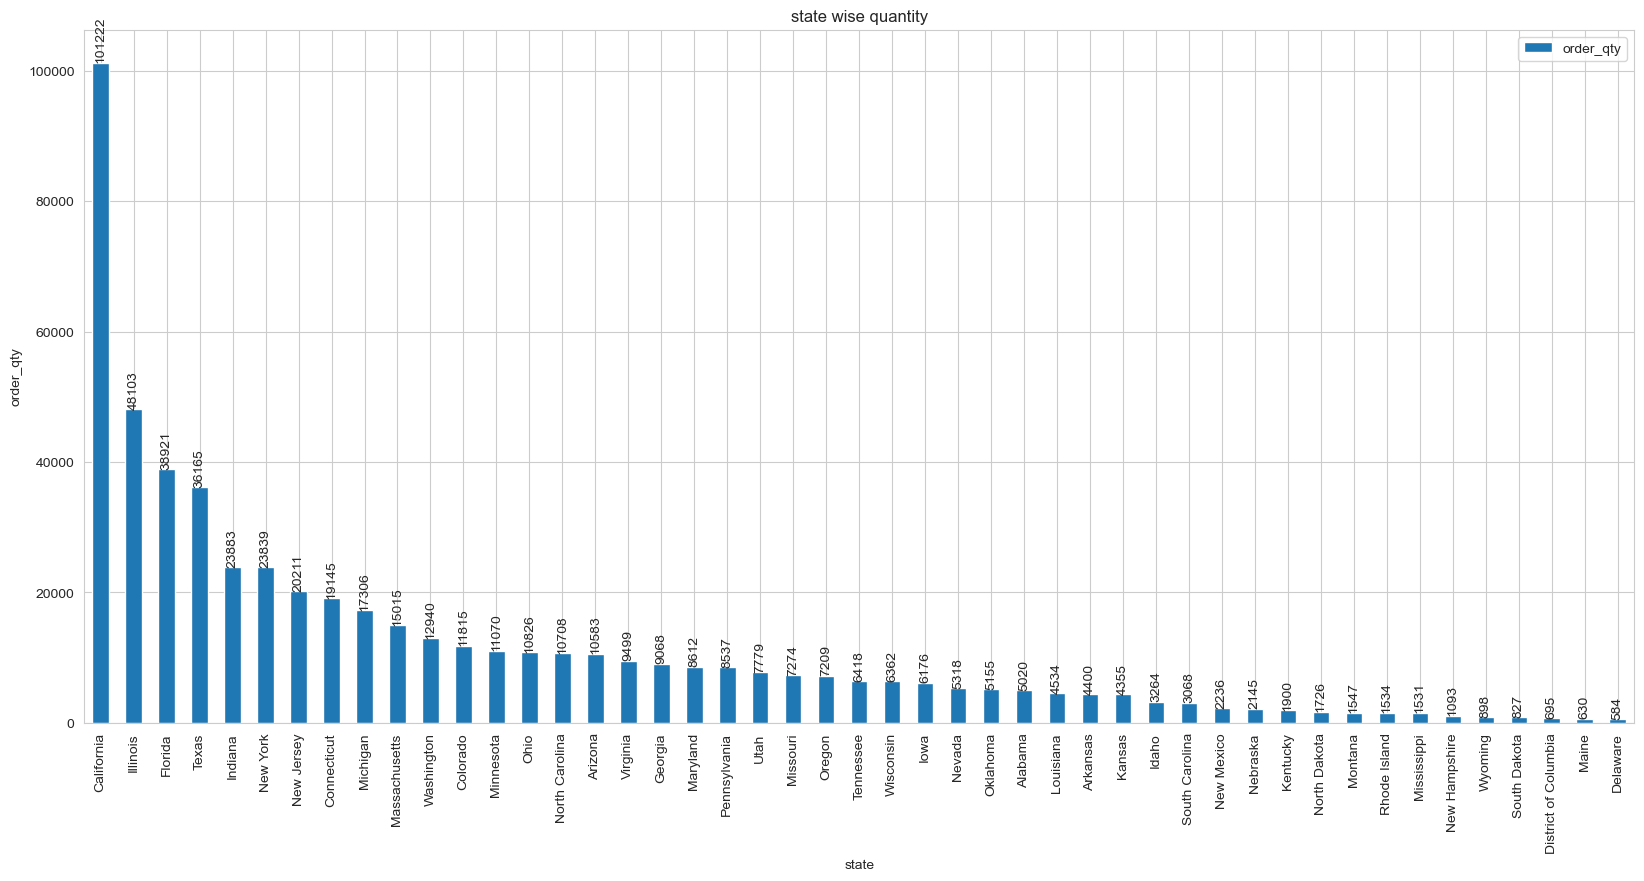

In [211]:
# which state is sold more quantity state wises
state_wise = rj.groupby('state')['order_qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(20,9))
ax = state_wise.plot(x='state',
                y='order_qty',kind='bar',
                legend = True,
               )
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{int(height)}', ha='center', va='bottom', rotation=90)
plt.title('state wise quantity')
plt.xlabel('state')
plt.ylabel('order_qty')
plt.show()


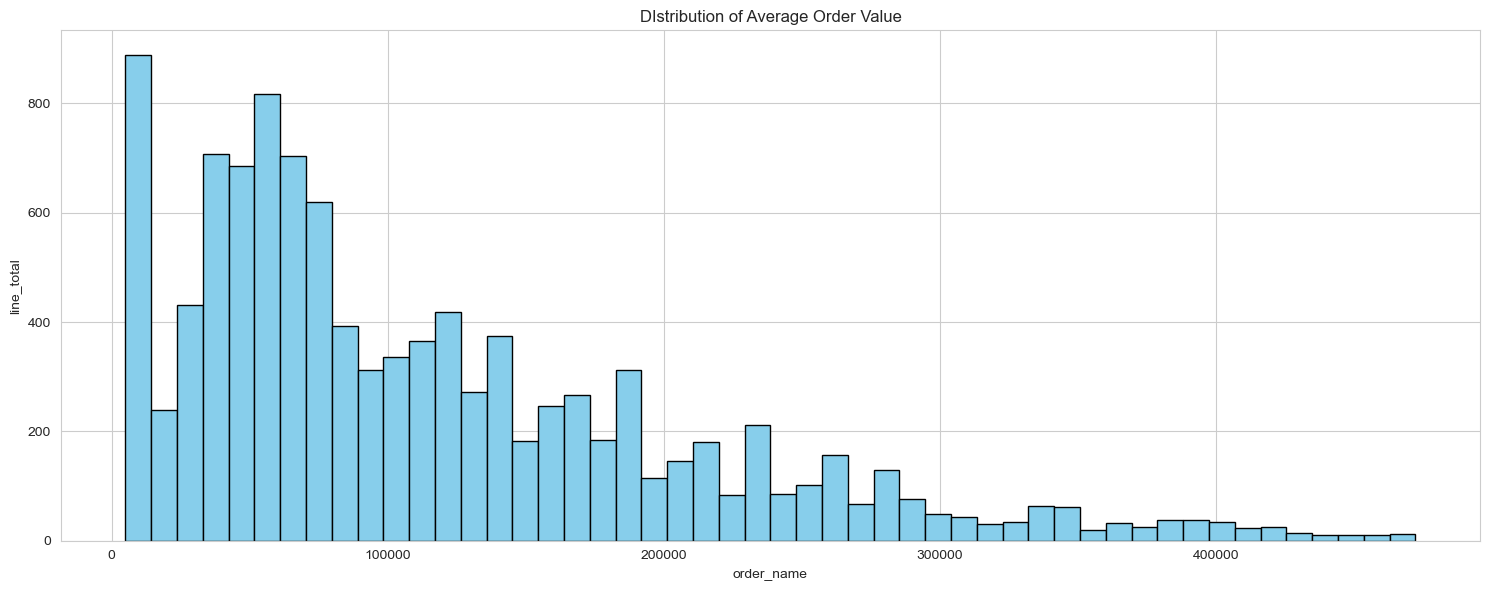

In [225]:
# Average Order Value (ADV) Distribution
AVD = rj.groupby('order_name')['line_total'].sum()
plt.figure(figsize=(15,6))
AVD.plot(kind = 'hist',bins = 50,
        color = 'skyblue',edgecolor = 'black')
plt.title('DIstribution of Average Order Value')
plt.xlabel('order_name')
plt.ylabel('line_total')
plt.tight_layout()
plt.show()

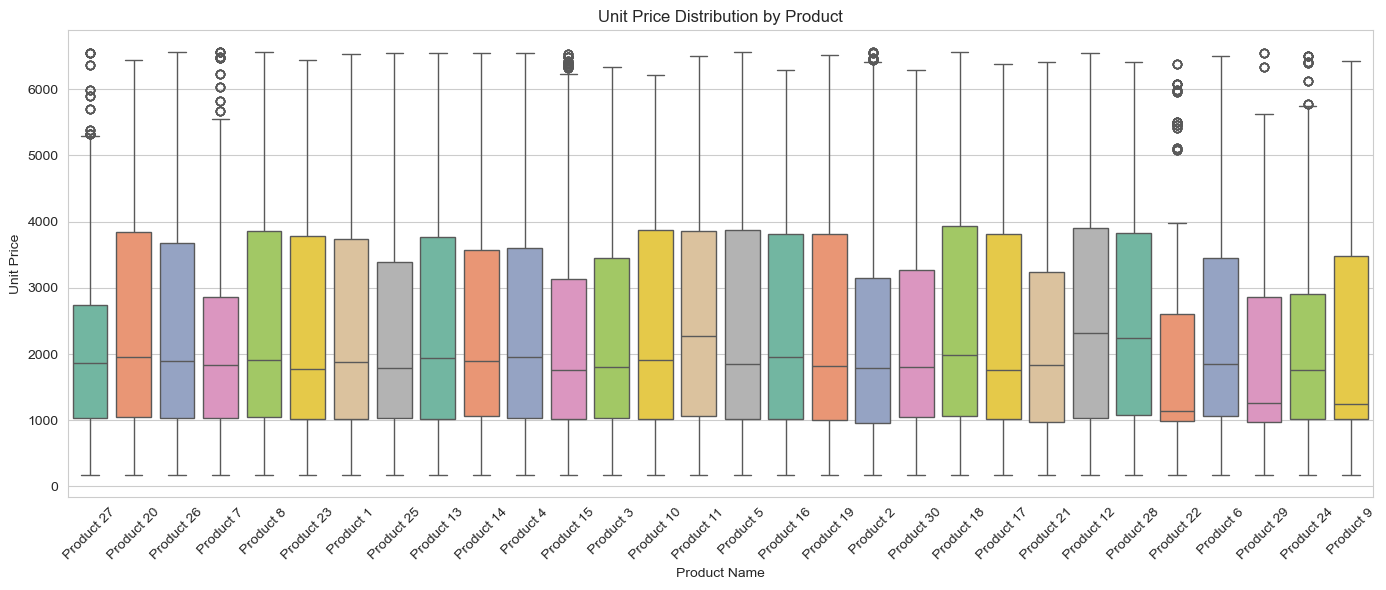

In [245]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=rj, x='product_name', y='unit_price', palette='Set2',hue='product_name')
plt.title('Unit Price Distribution by Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


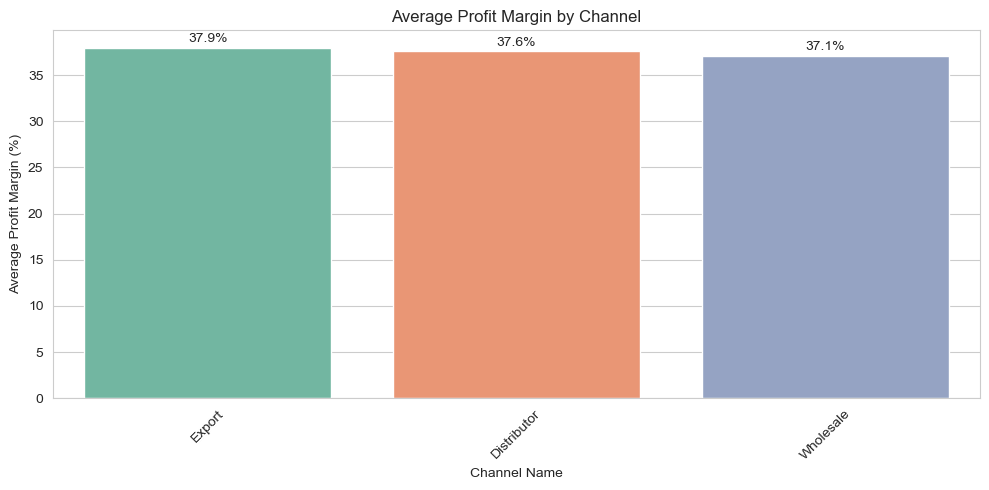

In [253]:

channel_margin = rj.groupby('channel_name')['margin_pct'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=channel_margin,
    x='channel_name',
    y='margin_pct',
    hue='channel_name',
    palette='Set2',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.title('Average Profit Margin by Channel')
plt.xlabel('Channel Name')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




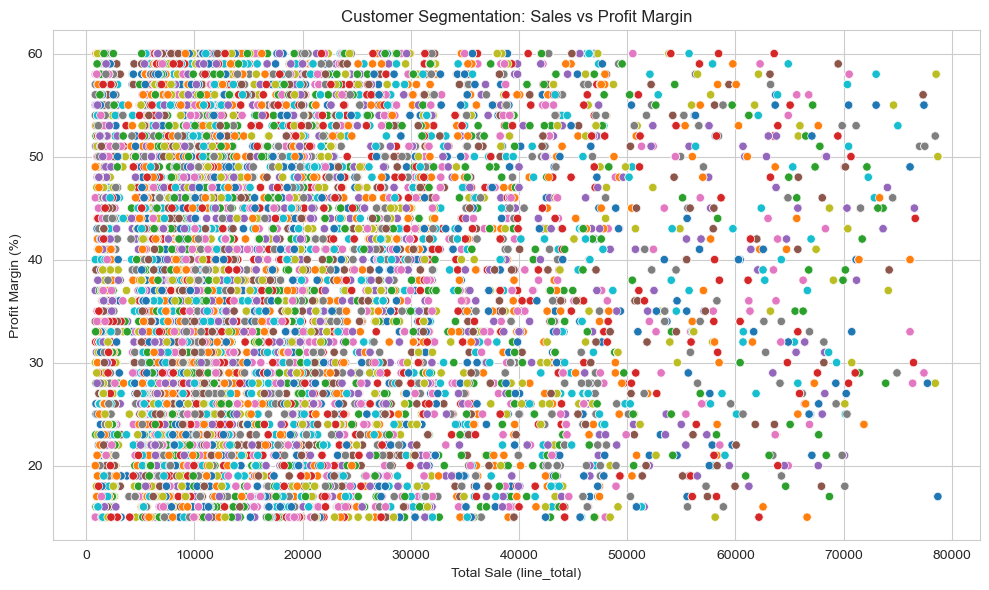

In [247]:
# To perform customer segmentation based on line_total (sales) vs profit margin

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rj, x='line_total', y='margin_pct', hue='customer_name', palette='tab10', legend=False)

plt.title('Customer Segmentation: Sales vs Profit Margin')
plt.xlabel('Total Sale (line_total)')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()


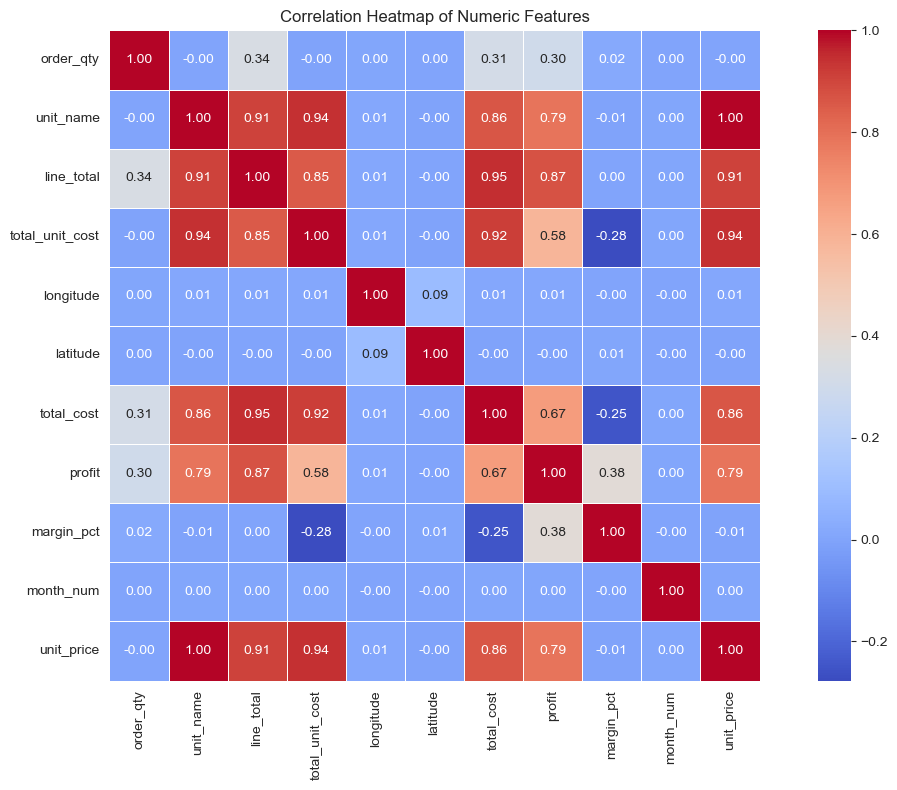

In [249]:
 # A correlation heatmap 


numeric_data = rj.select_dtypes(include='number')

corr_matrix = numeric_data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_11352\2793948772.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='Greens_r')


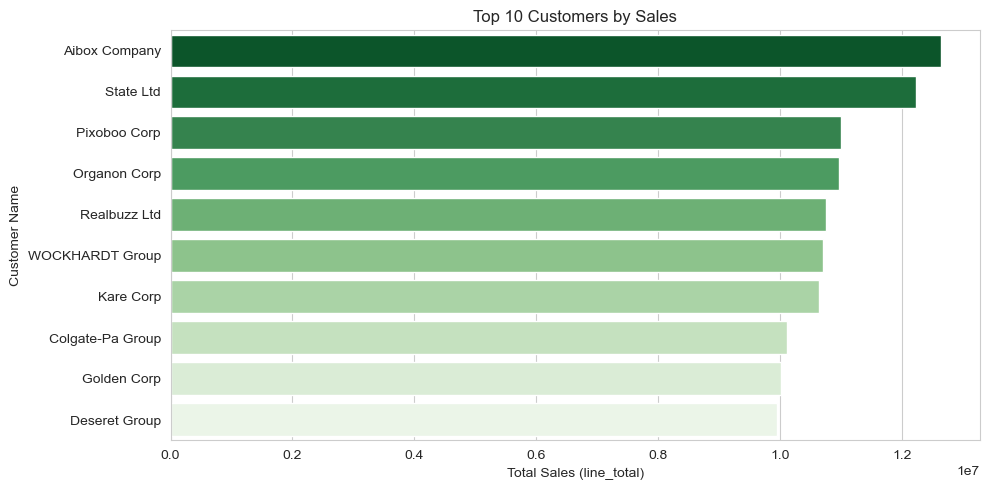

C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_11352\2793948772.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10.values, y=bottom_10.index, palette='Reds')


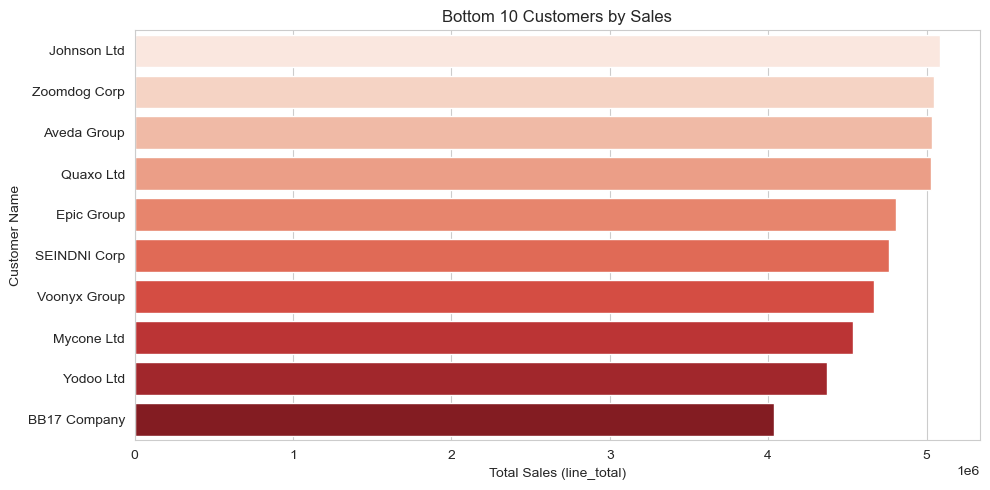

In [259]:
# Select top 10 and bottom 10 customers

customer_sales = rj.groupby('customer_name')['line_total'].sum().sort_values(ascending=False)
top_10 = customer_sales.head(10)
bottom_10 = customer_sales.tail(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10.values, y=top_10.index, palette='Greens_r')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales (line_total)')
plt.ylabel('Customer Name')
hue = 'Customer Name'

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=bottom_10.values, y=bottom_10.index, palette='Reds')
plt.title('Bottom 10 Customers by Sales')
plt.xlabel('Total Sales (line_total)')
plt.ylabel('Customer Name')
hue = 'Customer Name'
plt.tight_layout()
plt.show()
